In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
X = iris.data[:, [0, 2]]
y = iris.target

In [4]:
y = np.where(y == 0, 0, 1)

In [5]:
w = np.zeros(2)
b = 0

In [6]:
lr = 0.1
epochs = 50

In [7]:
def perceptron(x, w, b):
    z = np.dot(x, w) + b
    return np.where(z >= 0, 1, 0)

In [8]:
for epoch in range(epochs):
    for i in range(len(X)):
        x_i = X[i]
        target = y[i]
        output = perceptron(x_i, w, b)
        error = target - output
        w += lr * error * x_i
        b += lr * error

In [9]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = perceptron(np.c_[xx.ravel(), yy.ravel()], w, b)
Z = Z.reshape(xx.shape)

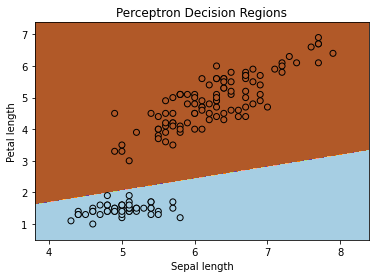

In [10]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Perceptron Decision Regions')
plt.show()